In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("wine.csv")

# 5.Chemical analysis of wines grown in a particular region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The attributes are: Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, and Proline. The data set has 178 observations and no missing values. 

In [3]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X=df.iloc[:,1:].values

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [6]:
X=scaler.fit_transform(X)

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X=pca.fit_transform(X)

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'The Elbow method')

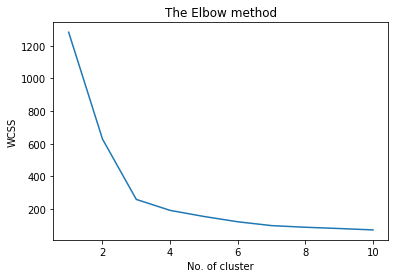

In [10]:
plt.plot(range(1,11),wcss)
plt.xlabel("No. of cluster")
plt.ylabel("WCSS")
plt.title("The Elbow method")

In [11]:
kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

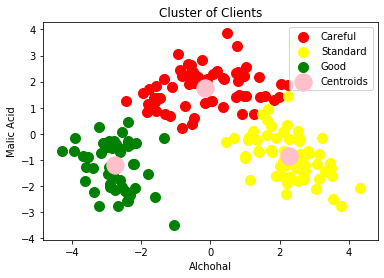

In [12]:
y_means=kmeans.fit_predict(X)
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100,c='red',label='Careful')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100,c='yellow',label='Standard')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=100,c='green',label='Good')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='pink',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Alchohal')
plt.ylabel('Malic Acid')
plt.legend()
plt.show()

In [13]:
#dendrogram

In [14]:
import scipy.cluster.hierarchy as sch

In [15]:
from sklearn.cluster import AgglomerativeClustering

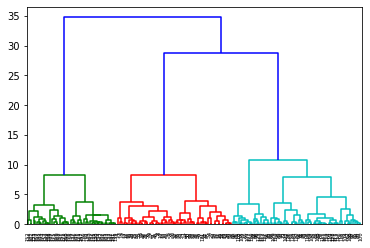

In [16]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward',metric='euclidean'))

In [17]:
cluster=AgglomerativeClustering(n_clusters=2)
cluster.fit(X)
y_pred=cluster.fit_predict(X)

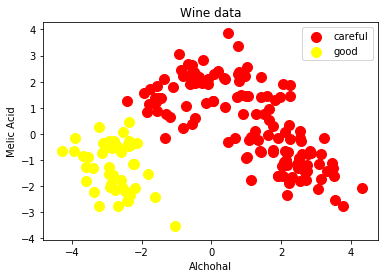

In [18]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100,c='red',label='careful')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='yellow',label="good")
plt.title('Wine data')
plt.xlabel('Alchohal')
plt.ylabel("Melic Acid")
plt.legend()
plt.show()